# Laboratorio 1
Brian Carrillo, Carlos Lopez - Data Science

In [5]:
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install ydata_profiling
!pip3 install scikit-learn
!pip3 install factor_analyzer
!pip3 install mlxtend

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 21.2 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 15.6 MB/s eta 0:00:01
     |████████████████████████████████| 244 kB 21.3 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 9.1 MB/s  eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgra

In [3]:
# Importaciones
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.decomposition import PCA
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from mlxtend.frequent_patterns import apriori, association_rules

/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [42]:
# Carga de datos
df = pd.read_csv('risk_factors_cervical_cancer.csv')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


Generate report structure:   0%|          | 0/1 [00:04<?, ?it/s]


KeyboardInterrupt: 

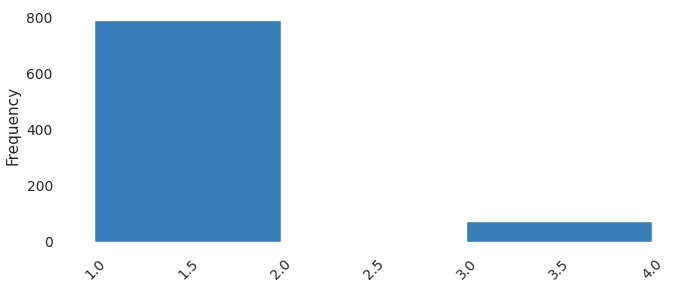

In [8]:
# Generar reporte
profile = ProfileReport(df,title="Reporte de Pandas Profiling", explorative=True)
profile.to_file("reporte-1.html")

#### Procesamiento previo

In [43]:
# Valores nulos
nan_columns = df.columns[df.isna().any()].tolist()
print(nan_columns)

# Valores desconocidos ?
df_str = df.astype(str)
mask = df_str.isin(['?']).any()
print(df_str.columns[mask])

[]
Index(['Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis'],
      dtype='object')


In [44]:
# Longitud original
print(len(df))

# Eliminando filas con valores desconocidos
mask = df_str.isin(['?']).any(axis=1)
df_clean = df_str[~mask]
len(df_clean)

# No existe viabilidad en eliminar todos las filas con un valor ?

858


59

In [45]:
# Eliminar filas con valor ? en Number en Sexual Partners,
# puesto que el desconocimiento de su valores supone desconocer
# los valores First sexual intercourse, Num of pregnancies
columns = ['Number of sexual partners','First sexual intercourse','Num of pregnancies']
mask = ~df[columns].isin(['?']).any(axis=1)
df = df[mask]
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [46]:
# Eliminar filas con valor ? en Smokes y sus columnas derivadas, debido
# a su corta cantidad en proporcion del total
columns = ['Smokes','Smokes (years)','Smokes (packs/year)']
mask = ~df[columns].isin(['?']).any(axis=1)
df = df[mask]
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [47]:
# Sustitucion de valores ? por 0 en Hormonal Contraceptives y sus columnas derivadas,
# debido a su moderada cantidad
df.loc[:, ['Hormonal Contraceptives', 'Hormonal Contraceptives (years)']] = df[['Hormonal Contraceptives', 'Hormonal Contraceptives (years)']].replace('?', 0.0)
df.loc[:,'Hormonal Contraceptives'] = df['Hormonal Contraceptives'].astype(float)
df.loc[:,'Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].astype(float)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [48]:
# Sustitucion de valores ? por 0 en IUD,  y sus columnas derivadas,
# debido a su moderada cantidad
df.loc[:, ['IUD', 'IUD (years)']] = df[['IUD', 'IUD (years)']].replace('?', 0.0)
df.loc[:,'IUD'] = df['IUD'].astype(float)
df.loc[:,'IUD (years)'] = df['IUD (years)'].astype(float)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [49]:
# Sustitucion de valores ? por 0 en STDs,  y sus columnas derivadas,
# debido a su moderada cantidad
df.loc[:, ['STDs', 'STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis']] = df[['STDs', 'STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis']].replace('?', 0.0)
columns_to_convert = ['STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis']

for col in columns_to_convert:
    df.loc[:, col] = df[col].astype(float)

df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [50]:
# Eliminacion de columnas 'STDs:Time since first diagnosis' y
# 'STDs:Time since last diagnosis', debido a la alta cantidad
# de valores ? y al poco impacto sobre el analsis
df = df.loc[:, ~df.columns.isin(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])]
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [17]:
# Generar un nuevo reporte
profile = ProfileReport(df,title="Reporte de Pandas Profiling", explorative=True)
profile.to_file("reporte-2.html")

/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s, Describe variable:Smokes]/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/ydata_profiling/model/pandas/summary_pandas.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan)
/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/ydata_profiling/model/pandas/summary_pandas.py:39: F

KeyboardInterrupt: 

#### Correlacion entre variables

In [51]:
numerical_columns = [
    'Age',
    'Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies',
    'Smokes (years)',
    'Smokes (packs/year)',
    'Hormonal Contraceptives (years)',
    'IUD (years)',
    'STDs (number)',
    'STDs: Number of diagnosis'
]

# Seleccion columnas numericas
numerical_df = df[numerical_columns]

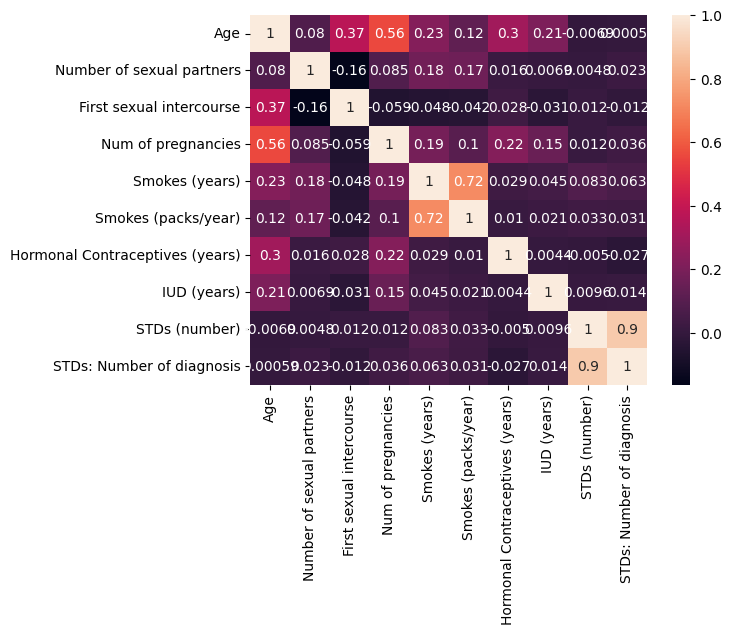

In [19]:
matriz_corr = numerical_df.corr()
sns.heatmap(matriz_corr, annot=True)
plt.show()

In [20]:
#Identificar variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

In [32]:
#Aplicar One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_columns])

In [33]:
#DataFrame con las variables codificadas
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

In [34]:
#Combinar las variables numéricas con las categóricas codificadas
numerical_columns = [
    'Age',
    'Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies',
    'Smokes (years)',
    'Smokes (packs/year)',
    'Hormonal Contraceptives (years)',
    'IUD (years)',
    'STDs (number)',
    'STDs: Number of diagnosis'
]
numerical_df = df[numerical_columns]

combined_df = pd.concat([numerical_df.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)


In [35]:
#Normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df)


In [36]:
#Realizar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [37]:
#Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])


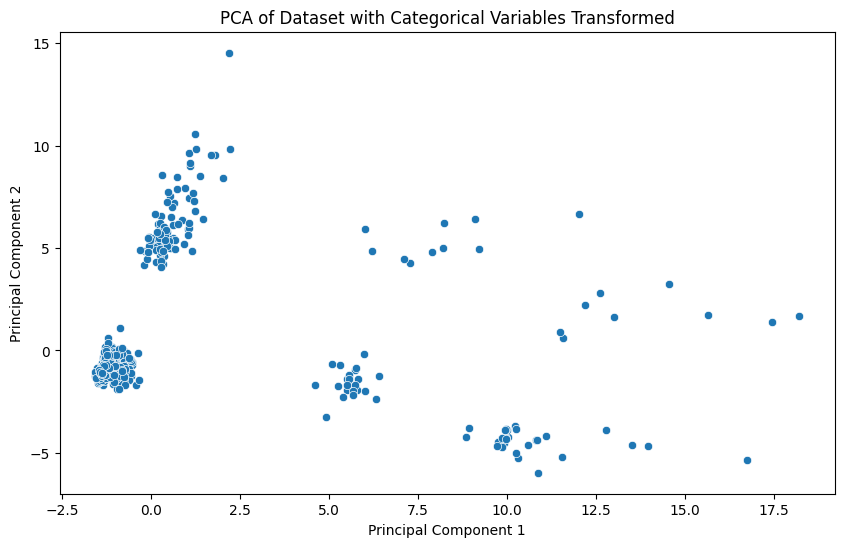

In [38]:
#Visualización de los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df)
plt.title('PCA of Dataset with Categorical Variables Transformed')
plt.show()

In [52]:
#Evaluación de la varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el primer componente: {explained_variance[0]:.2f}')
print(f'Varianza explicada por el segundo componente: {explained_variance[1]:.2f}')

Varianza explicada por el primer componente: 0.04
Varianza explicada por el segundo componente: 0.03


### Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?

##### Varianza Explicada: Los dos primeros componentes principales explican solo el 7% de la varianza total (4% el primero y 3% el segundo). Este valor es muy bajo, indicando que los componentes principales no están capturando mucha información relevante de los datos originales.
##### Gráfica del PCA: La gráfica muestra una dispersión considerable sin una estructura clara, sugiriendo que las variables categóricas transformadas no aportan una agrupación significativa o información adicional útil para el análisis.

##### Dado que la varianza explicada es muy baja y la gráfica no muestra una estructura clara, no vale la pena incluir las variables categóricas transformadas en el PCA en este caso.

In [57]:
numerical_columns = [
    'Age',
    'Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies',
    'Smokes (years)',
    'Smokes (packs/year)',
    'Hormonal Contraceptives (years)',
    'IUD (years)',
    'STDs (number)',
    'STDs: Number of diagnosis'
]

In [58]:
#Selección de columnas numéricas
numerical_df = df[numerical_columns]

In [59]:
# Normalización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

In [63]:
#Calcular el índice KMO
kmo_all, kmo_model = calculate_kmo(scaled_data)
print(f'Índice KMO: {kmo_model:.2f}')

Índice KMO: 0.49


In [64]:
# Calcular el test de esfericidad de Bartlett
bartlett_chi_square, bartlett_p_value = calculate_bartlett_sphericity(scaled_data)
print(f'Test de esfericidad de Bartlett - Chi Cuadrado: {bartlett_chi_square:.2f}, p-valor: {bartlett_p_value:.2f}')

Test de esfericidad de Bartlett - Chi Cuadrado: 2568.85, p-valor: 0.00


In [65]:
# Realizar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [66]:
# DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

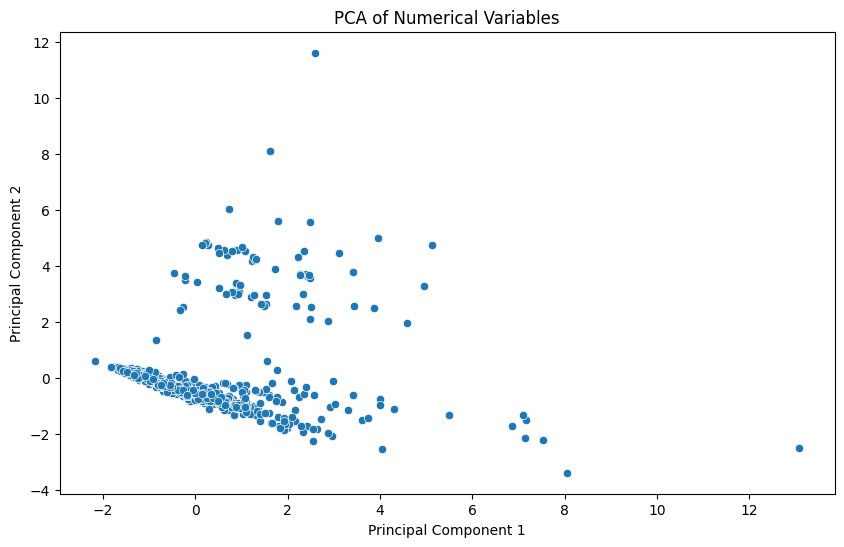

In [67]:
# Visualización de los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df)
plt.title('PCA of Numerical Variables')
plt.show()

In [68]:
# Evaluación de la varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el primer componente: {explained_variance[0]:.2f}')
print(f'Varianza explicada por el segundo componente: {explained_variance[1]:.2f}')

Varianza explicada por el primer componente: 0.22
Varianza explicada por el segundo componente: 0.19


In [69]:
# Obtener los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=numerical_columns)
print(loadings)

                                 Principal Component 1  Principal Component 2
Age                                           0.453031              -0.249051
Number of sexual partners                     0.196028              -0.025169
First sexual intercourse                      0.062422              -0.085507
Num of pregnancies                            0.413803              -0.185589
Smokes (years)                                0.481852              -0.042562
Smokes (packs/year)                           0.425166              -0.048239
Hormonal Contraceptives (years)               0.211165              -0.160197
IUD (years)                                   0.166613              -0.074917
STDs (number)                                 0.218781               0.655969
STDs: Number of diagnosis                     0.219189               0.655649


##### Principal Component 1:
##### Carga Alta: Age (0.45), Smokes (years) (0.48), Smokes (packs/year) (0.43), Num of pregnancies (0.41)
##### Interpretación: El primer componente parece estar influenciado principalmente por la edad, el historial de fumar (años y paquetes por año) y el número de embarazos. Este componente puede interpretarse como una medida de experiencia de vida y comportamientos de salud relacionados con la edad y el tabaquismo.

##### Principal Component 2:
##### Carga Alta: STDs (number) (0.66), STDs: Number of diagnosis (0.66)
##### Interpretación: El segundo componente está altamente influenciado por el número de enfermedades de transmisión sexual y el número de diagnósticos de ETS. Este componente puede interpretarse como una medida de la historia de ETS.

##### 1. Índice KMO

##### Índice KMO: 0.49, Un índice KMO inferior a 0.6 generalmente se considera bajo, lo que sugiere que las variables no son lo suficientemente adecuadas para el PCA. Idealmente, un valor de KMO por encima de 0.6 es preferible para realizar PCA.
##### 2. Test de Esfericidad de Bartlett

##### Chi Cuadrado: 2568.85, ##### p-valor: 0.00, ##### Un p-valor menor a 0.05 indica que las variables están correlacionadas y que el PCA puede ser útil. En este caso, el test de esfericidad de Bartlett sugiere que las variables están correlacionadas, lo cual es favorable para el PCA.
##### 3. Varianza Explicada

##### Varianza explicada por el primer componente: 0.22 (22%), Varianza explicada por el segundo componente: 0.19 (19%). Los dos primeros componentes principales explican el 41% de la varianza total. Esto sugiere que estos componentes capturan una cantidad moderada de la variabilidad en los datos, pero no una mayoría significativa.


#### Resultados:
##### Índice KMO y Test de Esfericidad de Bartlett: Aunque el test de esfericidad de Bartlett sugiere que las variables están correlacionadas y son adecuadas para PCA, el índice KMO es bajo (0.49), lo que indica que las variables no son ideales para PCA.  Varianza Explicada: Los dos primeros componentes principales explican el 41% de la varianza total, lo cual es moderado pero no óptimo.  El primer componente principal está relacionado con la edad y el historial de tabaquismo, mientras que el segundo componente está relacionado con la historia de ETS.


### Estudie si es conveniente hacer un Análisis de Componentes Principales. Recuerde que puede usar el índice KMO y el test de esfericidad de Bartlett. Realice un análisis de componentes principales con las variables numéricas, discuta los resultados e interprete los componentes
##### Aunque el PCA proporciona una cierta cantidad de información útil, los resultados nos indican que las variables numéricas pueden no ser ideales para un análisis PCA debido al bajo índice KMO. 

In [4]:
# Discretizar las variables numéricas
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
discretized_data = discretizer.fit_transform(df[numerical_columns])

# Crear un DataFrame con las variables discretizadas
discretized_df = pd.DataFrame(discretized_data, columns=numerical_columns)

# Reemplazar las columnas numéricas originales con las discretizadas en el DataFrame original
df_discretized = df.copy()
df_discretized[numerical_columns] = discretized_df

# Convertir todas las columnas a tipo 'object' para aplicar Apriori
df_discretized = df_discretized.map(str)

# Convertir las columnas en dummies (variables binarias)
df_dummies = pd.get_dummies(df_discretized)

# Generar itemsets frecuentes
frequent_itemsets = apriori(df_dummies, min_support=0.1, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(by=['confidence', 'support'], ascending=[False, False])

# Mostrar las reglas de asociación
print(rules)

# Identificar variables muy frecuentes
item_support = frequent_itemsets.sort_values(by='support', ascending=False)
print(item_support.head())

# Si se identifican variables muy frecuentes, se pueden eliminar para obtener más insights
# Por ejemplo, si 'Age' es muy frecuente, podemos eliminarla y generar reglas nuevamente
variables_to_remove = [col for col in df_dummies.columns if 'Age' in col]  # Ajustar según el análisis de frecuencias

# Eliminar variables frecuentes
df_filtered = df_dummies.drop(columns=variables_to_remove)

# Generar itemsets frecuentes nuevamente
frequent_itemsets_filtered = apriori(df_filtered, min_support=0.1, use_colnames=True)

# Generar reglas de asociación nuevamente
rules_filtered = association_rules(frequent_itemsets_filtered, metric="confidence", min_threshold=0.6)
rules_filtered = rules_filtered.sort_values(by=['confidence', 'support'], ascending=[False, False])

# Mostrar las reglas de asociación filtradas
print(rules_filtered)

NameError: name 'df' is not defined